In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA

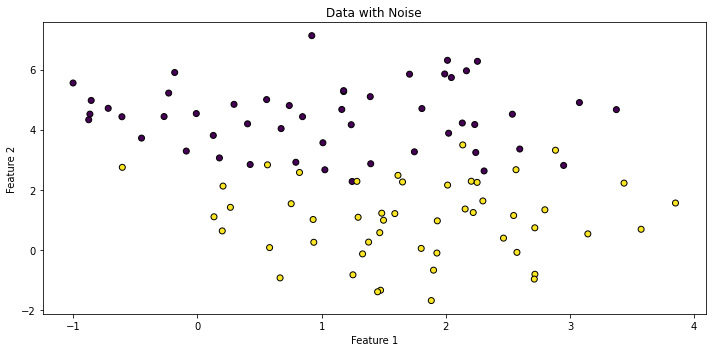

In [2]:
np.random.seed(42) 
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
noise_level = 1
noise = np.random.normal(0, noise_level, X.shape)
X = X + noise 

plt.figure(figsize=(10, 5))


plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Data with Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

**Logistic Regression**

In [3]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1] 

In [5]:
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))
print(f"Accuracy train: {accuracy_score(y_train, y_pred_train):.2f}")

Logistic Regression Performance:
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Accuracy train: 0.93


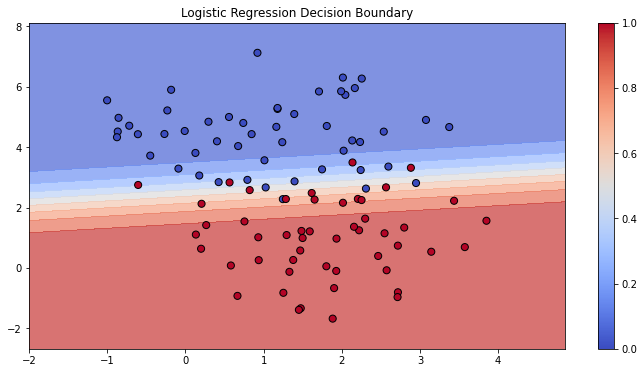

In [6]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300))


X_range = np.c_[xx.ravel(), yy.ravel()]

y_proba = log_reg.predict_proba(X_range)[:, 1]

y_proba = y_proba.reshape(xx.shape)

plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, y_proba, levels=np.linspace(0, 1, 10), cmap='coolwarm', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=50)
plt.title('Logistic Regression Decision Boundary')
plt.colorbar()
plt.show()

**SVM**

In [7]:
hard_margin_svm = SVC(kernel='linear', C=1e6)
hard_margin_svm.fit(X, y)

soft_margin_svm = SVC(kernel='linear', C=1)
soft_margin_svm.fit(X, y)

SVC(C=1, kernel='linear')

Accuracy of Hard Margin SVM: 0.89
Accuracy of Soft Margin SVM: 0.92


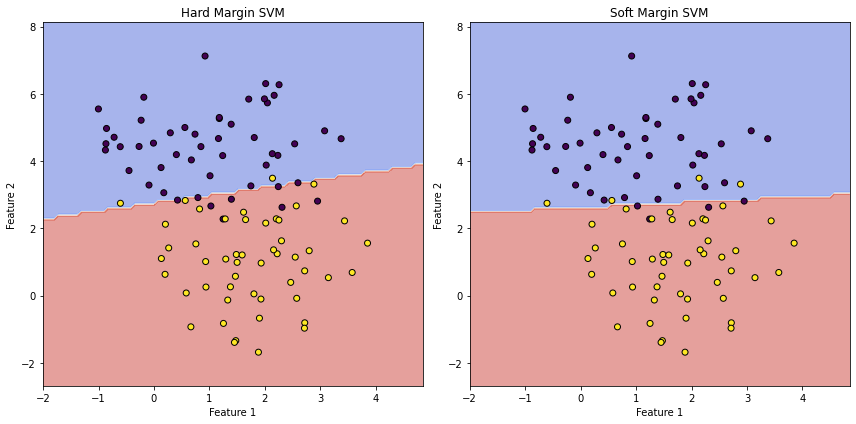

In [8]:
hard_margin_accuracy = hard_margin_svm.score(X, y)
soft_margin_accuracy = soft_margin_svm.score(X, y)

print(f"Accuracy of Hard Margin SVM: {hard_margin_accuracy:.2f}")
print(f"Accuracy of Soft Margin SVM: {soft_margin_accuracy:.2f}")

def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
   
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    ax.contourf(xx, yy, Z, alpha=0.5, cmap="coolwarm")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


plot_decision_boundary(hard_margin_svm, X, y, axes[0], "Hard Margin SVM")


plot_decision_boundary(soft_margin_svm, X, y, axes[1], "Soft Margin SVM")

plt.tight_layout()
plt.show()

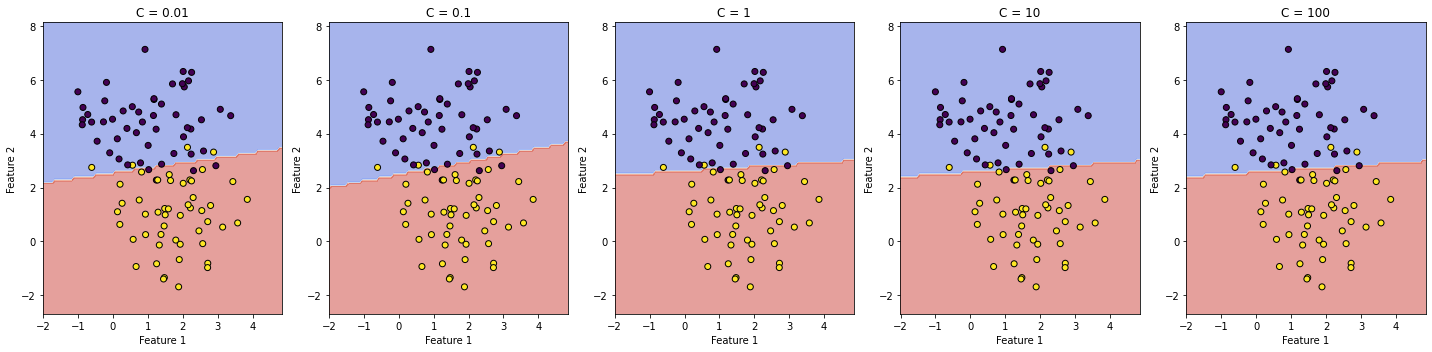

In [9]:
C_values = [1e-2, 0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(20, 5))
for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    plot_decision_boundary(svm, X, y, axes[i], f"C = {C}")

plt.tight_layout()
plt.show()

**K-means**

In [10]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
from sklearn.cluster import KMeans
inertia = []
for k in range (1,11):
    kmeans=KMeans(n_clusters=k, init = 'k-means++', random_state=42)
    kmeans.fit(iris_df)
    inertia.append(kmeans.inertia_)

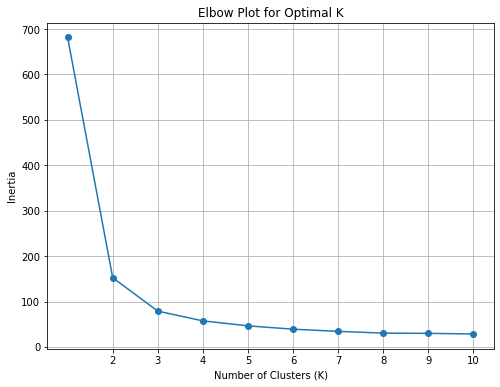

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Plot for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(range(2,11))
plt.grid(True)
plt.show()

In [13]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [14]:
iris_df['Cluster']=kmeans.fit_predict(iris_df)

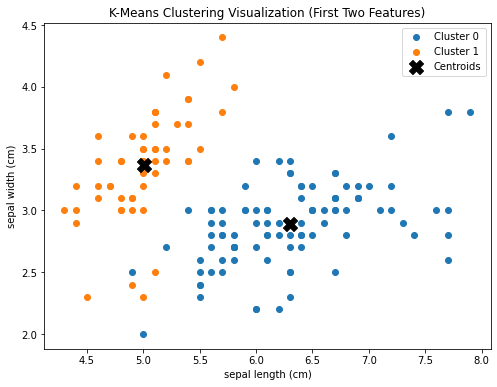

In [15]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(iris_df.loc[iris_df['Cluster'] == cluster, iris_df.columns[0]],
                iris_df.loc[iris_df['Cluster'] == cluster, iris_df.columns[1]],
                label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title("K-Means Clustering Visualization (First Two Features)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

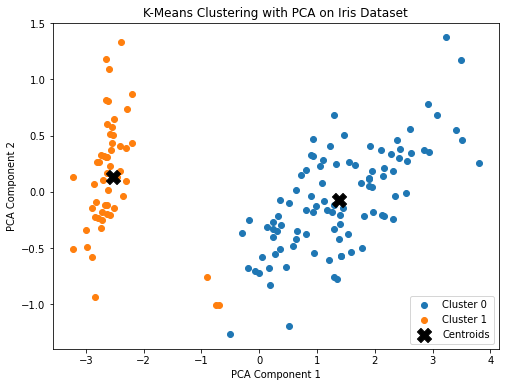

In [18]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df.iloc[:, :-3]) 


iris_df['PCA1'] = iris_pca[:, 0]
iris_df['PCA2'] = iris_pca[:, 1]


plt.figure(figsize=(8, 6))

for cluster in range(2): 
    plt.scatter(iris_df.loc[iris_df['Cluster'] == cluster, 'PCA1'],
                iris_df.loc[iris_df['Cluster'] == cluster, 'PCA2'],
                label=f'Cluster {cluster}')


centroids_pca = pca.transform(kmeans.cluster_centers_)


plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=200, c='black', marker='X', label='Centroids')


plt.title("K-Means Clustering with PCA on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.show()

**K-modes**

In [19]:
bank = pd.read_csv('bankmarketing.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [21]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [22]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [23]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)

In [24]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [25]:
bank_cust.shape

(41188, 11)

In [26]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,9
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,16385


In [27]:
bank_cust.isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
age_bin        0
dtype: int64

In [28]:
bank_cust_copy = bank_cust.copy()

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [30]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [31]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [32]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [33]:
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


In [34]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8472, cost: 197105.0


In [35]:
fitClusters_huang

array([0, 0, 0, ..., 1, 0, 1], dtype=uint16)

In [36]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


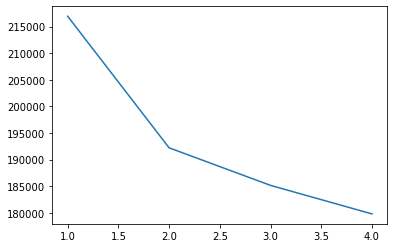

In [37]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [38]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [39]:
bank_cust = bank_cust_copy.reset_index()

In [40]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [41]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,1
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,1


In [42]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [43]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                28293 non-null  object  
 1   marital            28293 non-null  object  
 2   education          28293 non-null  object  
 3   default            28293 non-null  object  
 4   housing            28293 non-null  object  
 5   loan               28293 non-null  object  
 6   contact            28293 non-null  object  
 7   month              28293 non-null  object  
 8   day_of_week        28293 non-null  object  
 9   poutcome           28293 non-null  object  
 10  age_bin            28293 non-null  category
 11  cluster_predicted  28293 non-null  uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 2.5+ MB


In [44]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12895 entries, 0 to 41186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                12895 non-null  object  
 1   marital            12895 non-null  object  
 2   education          12895 non-null  object  
 3   default            12895 non-null  object  
 4   housing            12895 non-null  object  
 5   loan               12895 non-null  object  
 6   contact            12895 non-null  object  
 7   month              12895 non-null  object  
 8   day_of_week        12895 non-null  object  
 9   poutcome           12895 non-null  object  
 10  age_bin            12895 non-null  category
 11  cluster_predicted  12895 non-null  uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 1.1+ MB


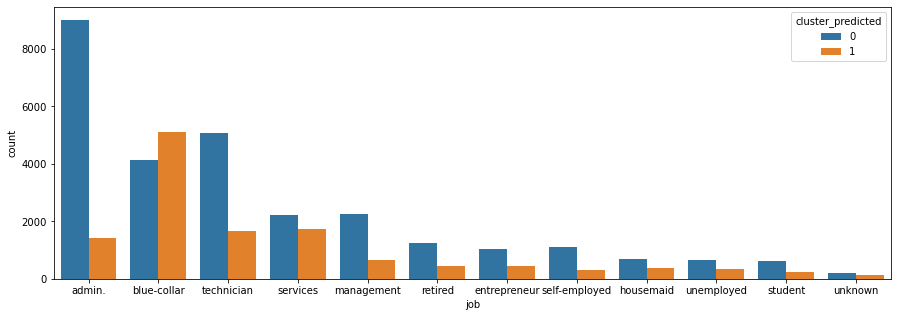

In [45]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

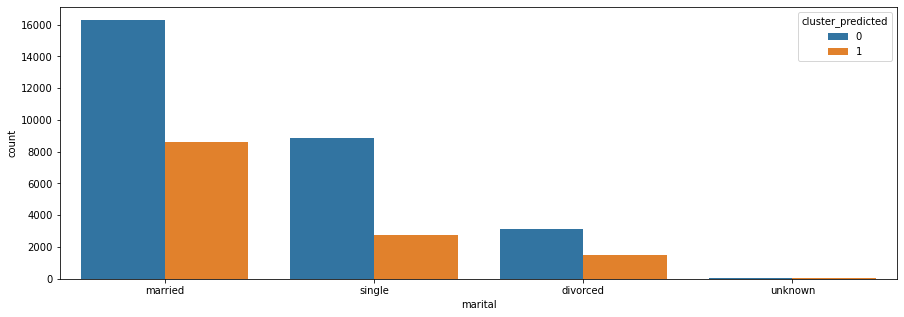

In [46]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()


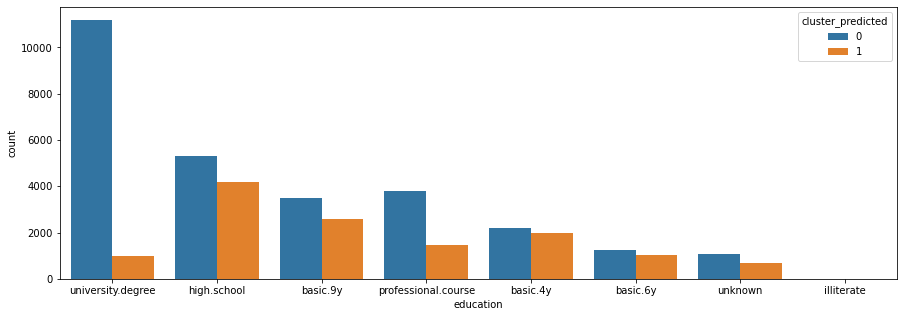

In [47]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

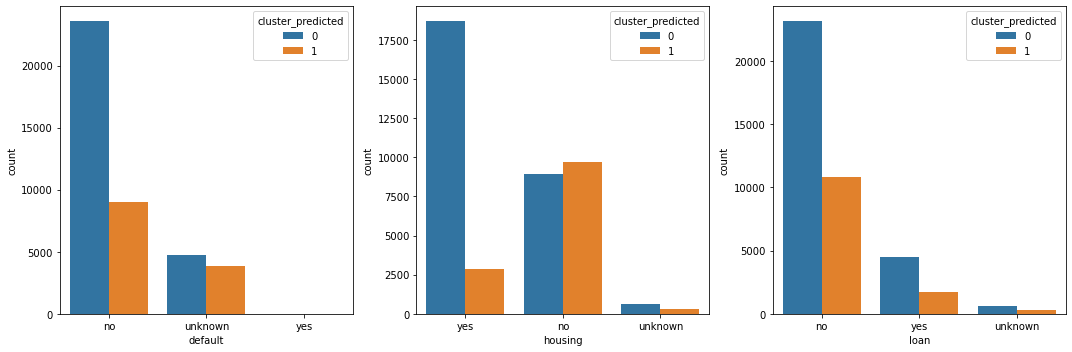

In [48]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['loan'],order=combinedDf['loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

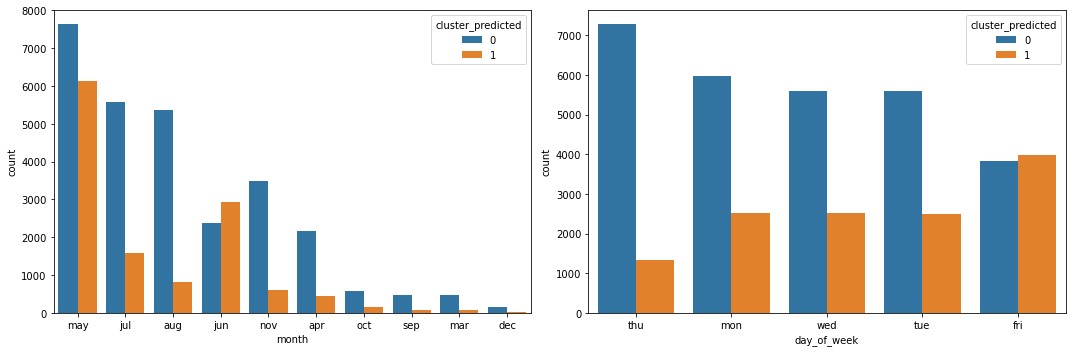

In [49]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['day_of_week'],order=combinedDf['day_of_week'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

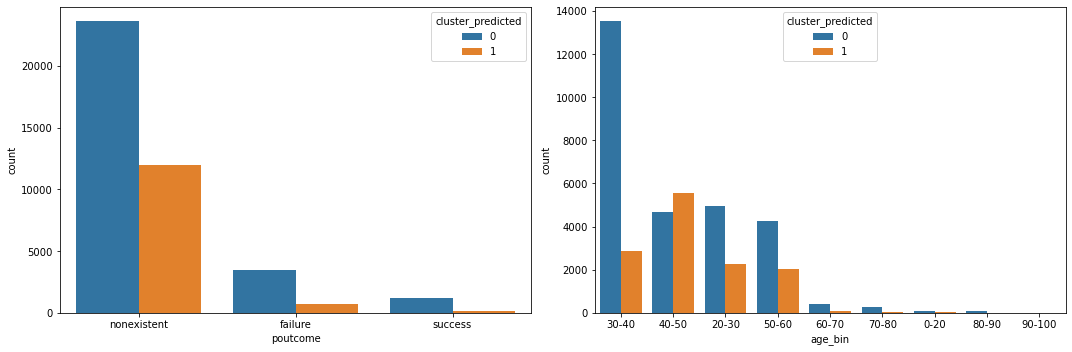

In [50]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['poutcome'],order=combinedDf['poutcome'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()